# Predicting customer churn (preprocessing)

## Common imports

In [54]:
import pandas as pd
import os

## Constants

In [55]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

## Convert non-numeric values to numeric

In [56]:
df = pd.read_csv('data/customer-churn-raw.csv')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,1
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,1


In [57]:
df.shape

(20000, 12)

In [58]:
mapCOLLEGE                    = {label:idx for idx,label in enumerate(['zero','one'])}
mapREPORTED_SATISFACTION      = {label:idx for idx,label in enumerate(['very_sat', 'sat', 'avg', 'unsat', 'very_unsat'])}
mapREPORTED_USAGE_LEVEL       = {label:idx for idx,label in enumerate(['very_high','high','avg', 'little','very_little'])}
mapCONSIDERING_CHANGE_OF_PLAN = {label:idx for idx,label in enumerate(['never_thought', 'no', 'considering', 'perhaps', 'actively_looking_into_it'])}

In [59]:
df['COLLEGE']                    = df['COLLEGE'].map(mapCOLLEGE)
df['REPORTED_SATISFACTION']      = df['REPORTED_SATISFACTION'].map(mapREPORTED_SATISFACTION)
df['REPORTED_USAGE_LEVEL']       = df['REPORTED_USAGE_LEVEL'].map(mapREPORTED_USAGE_LEVEL)
df['CONSIDERING_CHANGE_OF_PLAN'] = df['CONSIDERING_CHANGE_OF_PLAN'].map(mapCONSIDERING_CHANGE_OF_PLAN)

In [60]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,3,3,1,1
1,1,36147,0,13,800586,244,0,6,3,3,2,1
2,1,27273,230,0,305049,201,16,15,3,4,3,1
3,0,120070,38,33,788235,780,3,2,3,0,2,0
4,1,29215,208,85,224784,241,21,1,4,3,0,1


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COLLEGE,20000.0,0.50240,0.500007,0.0,0.00,1.0,1.00,1.0
INCOME,20000.0,80281.44775,41680.586319,20007.0,42217.00,75366.5,115881.75,159983.0
OVERAGE,20000.0,85.97955,85.992324,-2.0,0.00,59.0,179.00,335.0
LEFTOVER,20000.0,23.89865,26.816645,0.0,0.00,14.0,41.00,89.0
HOUSE,20000.0,493155.26425,252407.884692,150002.0,263714.25,452259.5,702378.00,999996.0
HANDSET_PRICE,20000.0,389.61510,213.820682,130.0,219.00,326.0,533.25,899.0
OVER_15MINS_CALLS_PER_MONTH,20000.0,8.00070,8.925418,0.0,1.00,4.0,15.00,29.0
AVERAGE_CALL_DURATION,20000.0,6.00225,4.402558,1.0,2.00,5.0,10.00,15.0
REPORTED_SATISFACTION,20000.0,2.43390,1.629437,0.0,0.00,3.0,4.00,4.0
REPORTED_USAGE_LEVEL,20000.0,2.18495,1.511839,0.0,0.00,3.0,3.00,4.0


In [62]:
df.to_csv('data/customer-churn.csv', index=False)

## Generate decision tree image 

In [63]:
df = pd.read_csv('data/customer-churn.csv')

In [64]:
from sklearn.tree import DecisionTreeClassifier

X = df.loc[:, df.columns != 'LEAVE']
y = df.loc[:, df.columns == 'LEAVE']

In [65]:
tree_d2 = DecisionTreeClassifier(
    criterion = "entropy", # “gini” or “entropy”, default=”gini”
    max_depth = 2)

tree_d2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [66]:
from graphviz import Source
from sklearn.tree import export_graphviz

def visualize_tree(tree_clf, feature_names, class_names, viz_name):
    export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, viz_name),
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )   

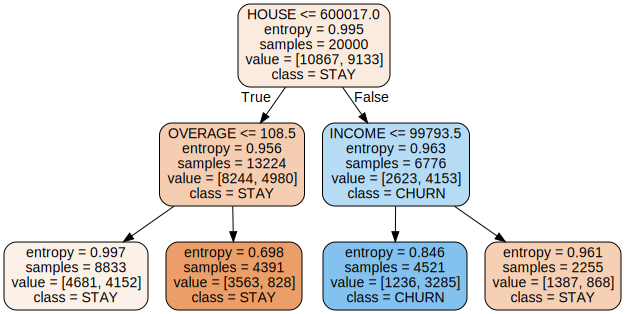

In [67]:
viz_name= "customer-churn_tree-depth-2.dot"
visualize_tree(tree_d2, list(X.columns), ["STAY", "CHURN"], viz_name)
Source.from_file(os.path.join(IMAGES_PATH, viz_name))

### Transform dot to standard image format

`dot -Tpng <input>.dot > <output>.png`

In [68]:
tree_d3 = DecisionTreeClassifier(
    criterion = "entropy", # “gini” or “entropy”, default=”gini”
    max_depth = 3)

tree_d3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

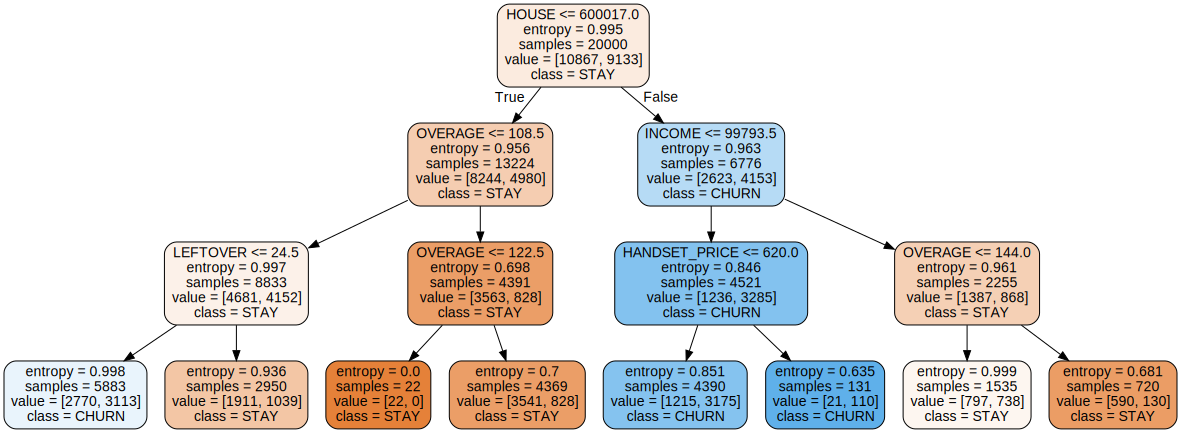

In [69]:
viz_name= "customer-churn_tree-depth-3.dot"
visualize_tree(tree_d3, list(X.columns), ["STAY", "CHURN"], viz_name)
Source.from_file(os.path.join(IMAGES_PATH, viz_name))

# References

https://github.com/vutsalsinghal/Churn-Prediction/blob/master/solution.ipynb